# Сборный проект.
# Анализ поведения пользователей мобильного приложения

В ходе исследования мы изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Ответим на такие вопросы, как сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
 Дизайнеры предложили поменять шрифты во всём приложении. Для того, чтобы выяснить, какой шрифт лучше, новый или старый, будет проведен A/A/B-тест, результаты которого помогут ответить на этот вопрос.
 
 Исследование будет проходить в несколько этапов:
 
1. Подготовка данных:
    * Пииведем названия столбцов к единому стилю;
    * Проверим пропуски и типы данных. Откорректируем, если необходимо;
    * Добавим столбец даты и времени, а также отдельный столбец с датами;
2. Изучим и проверим данные:
    * Сколько всего событий в логе?
    * Сколько всего пользователей в логе?
    * Сколько в среднем событий приходится на пользователя?
    * Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп; 
    * Ответим на вопрос, можно ли быть уверенным, что у вас одинаково полные данные за весь период? Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?
    * Много ли событий и пользователей мы потеряли, отбросив старые данные?
    * Проверим, что у нас есть пользователи из всех трёх экспериментальных групп;
3. Изучим воронку событий:
    * Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
    * Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
    * Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку?
    * По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
    * На каком шаге теряем больше всего пользователей?
    * Какая доля пользователей доходит от первого события до оплаты?
4. Изучим результаты эксперимента:
    * Сколько пользователей в каждой экспериментальной группе?
    * Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247;
    * Выберим самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Ответим на вопрос, можно ли сказать, что разбиение на группы работает корректно;
    * Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Сформируем выводы из эксперимента;
    * Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Ответим на вопрос, какой уровень значимости стоит применить.

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Предустановки](#setup)
    * [Установка необходимых библиотек](#setup1)
    * [Установка необходимых настроек](#setup2)
    * [Создание необходимых функций для автоматизации исследования](#setup3)       
* [Загрузка данных и первое знакомство с данными](#load_data)
    * [Описание данных](#load_data1)
    * [Загрузка данных](#load_data2)
    * [Первая информация по данным](#load_data3)
    * [Выводы](#load_data4)
* [Предобработка данных](#predobr_data)
    * [Выводы](#predobr_data1)    
* [Изучение и проверка данных](#analis_data)
    * [Выводы](#analis_data1)    
* [Изучение воронки событий](#analis_funnel)
    * [Выводы](#analis_funnel1)
* [Изучение результатов эксперимента](#analis_exp)
    * [Проверка на статистически значимое различие долей контрольных групп 246 и 247](#analis_exp1)
        * [Выводы](#analis_exp2)
    * [Проверка на статистически значимое различие долей между контрольными(246, 247) и экспериментальной(248) группами с поправкой Бонферрони](#analis_exp3)
        * [Выводы](#analis_exp4) 
    * [Проверка на статистически значимое различие долей между контрольными(246, 247) и экспериментальной(248) группами без поправки Бонферрони](#analis_exp5)
        * [Выводы](#analis_exp6)
* [Общие выводы по исследованию](#conclusion_project)

<a id="setup"></a>
## Предустановки

<a id="setup1"></a>
### Установка необходимых библиотек

In [1]:
# установим необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import wilcoxon
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

<a id="setup2"></a>
### Создание необходимых настроек

In [2]:
# запрет вывода больших чисел в научной нотации и разрешение выводить два десятичных знака после запятой
pd.set_option('display.float_format', '{:.3f}'.format)
# убираем предупреждения
warnings.filterwarnings("ignore")
# установим стиль отображения графика
sns.set(style='white')

<a id="setup3"></a>
### Создание необходимых функций для автоматизации исследования

In [3]:
# функция вывода основных данных по датафрейму
def first_data(df):
    print('Первые 5 строк датафрейма:')      
    display(df.head())
    print()
    print('Общая информамия по каждому столбцу датафрейма:')

    stat_df = pd.DataFrame({
        'count': df.count(), 
        'count_isna': df.isna().sum(),
        'perc_isna%': df.isna().mean()*100,   
        'nunique': df.nunique(),    
        'min': df.min(),
        'max': df.max(),
        'dtype':df.dtypes
                       }).reset_index()
    stat_df.rename(columns={'index': 'columns'}, inplace=True)
    stat_df['columns'] = pd.Categorical(stat_df['columns'], categories=df.columns, ordered=True)
    stat_df = stat_df.sort_values('columns').set_index('columns')
    display(stat_df)
    #display(stat_df)
    print(f'Количесвтво строк-дубликатов в датафрейме: {df.duplicated().sum()} ({df.duplicated().sum() / len(df) * 100:.1}% от числа всех строк).')

In [4]:
# функция приведения имен столбцов к единому стилю
def add_underscores(list_col):
    list_new_name = []
    for name in list_col:
        new_name = ''
        for i, char in enumerate(name):
            if char.isupper():
                if (
                    (i != 0 and (not name[i - 1].isupper())) 
                    or 
                    (i != 0 and (not name[i + 1].isupper()))
                ):
                    new_name += '_'

            new_name += char  # Добавляем текущий символ
        list_new_name.append(new_name)  # Добавляем модифицированное имя в результат
    list_new_name = list(map(str.lower, list_new_name))  # приведем имена столбцов к нижнему регистру
    return list_new_name

In [5]:
# круговая диаграмма
def pie_graph(data, title=None, col=[0, 1]):
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette('Set2', 4)
    plt.pie(data[data.columns[col[1]]], labels=data[data.columns[col[0]]], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(title, fontsize=16)
    plt.show()

In [6]:
# "воронка"
def funnel_graph(data, col, title_text='Воронка продаж'):
    fig = go.Figure(go.Funnel(
        y=data['event_name'],
        x=data[col],
        opacity=0.6,
        textposition='inside',
        textinfo='value + percent previous'
    ))
    fig.update_layout(title_text=title_text, title_x=0.5)
    fig.show()
    

In [7]:
# функция проведения z-теста с поправкой Бонферрони
def result_test_z(data1, data2, event_name, alpha=0.05, k_bonf=16):
    
    # критический уровень статистической значимости c поправкой Бонферрони
    bonf_alpha = alpha / k_bonf

    # число пользователей в группе 1 и группе 2:
    n_users = np.array([data1['device_id_hash'].nunique(), 
                        data2['device_id_hash'].nunique()])

    # число пользователей, совершивших событие в сравниваемых группах
    success = np.array([data1[data1['event_name'] == event_name]['device_id_hash'].nunique(), 
                        data2[data2['event_name'] == event_name]['device_id_hash'].nunique()])

    # пропорции успехов в группах:
    p1 = success[0] / n_users[0]
    p2 = success[1] / n_users[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

    # задаем стандартное нормальное распределение
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2  
    print()
    print('Сравниваемое событие:', event_name)
    print('р-значение равно', p_value)
    if p_value < bonf_alpha:
        print('Отвергаем нулевую гипотезу: разница между долями групп статистически значима')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой')


<a id="load_data"></a>
## Загрузка данных и первое знакомство с ними

<a id="load_data1"></a>
### Описание данных

Каждая запись в логе — это действие пользователя, или событие. 
* `EventName` — название события;
* `DeviceIDHash` — уникальный идентификатор пользователя;
* `EventTimestamp` — время события;
* `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

<a id="load_data2"></a>
### Загрузка данных

In [8]:
# выгружаем csv-файл и формируем датафрейм (таблицу данных)
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

<a id="load_data3"></a>
### Первая информация по данным

In [9]:
# обратимся к функции основных данных датасета
first_data(df)

Первые 5 строк датафрейма:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248



Общая информамия по каждому столбцу датафрейма:


,count,count_isna,perc_isna%,nunique,min,max,dtype
columns,,,,,,,
EventName,244126,0,0.000,5,CartScreenAppear,Tutorial,object
DeviceIDHash,244126,0,0.000,7551,6888746892508752,9222603179720523844,int64
EventTimestamp,244126,0,0.000,176654,1564029816,1565212517,int64
ExpId,244126,0,0.000,3,246,248,int64


Количесвтво строк-дубликатов в датафрейме: 413 (0.2% от числа всех строк).


<a id="load_data4"></a>
### Выводы
При первом знакомстве с данными, мы видим что в столбцах есть повторения. Исходя из описания данных столбцов, информация в них не подразумевают уникальность. Поэтому повторяющиеся значения для них, это нормально. Но на всякий случай проверим в следующем разделе на скрытые дубликаты столбенц **EventName**. Все типы данных в столбцах указаны в соответствии с их значениями. В столбце **EventTimestamp** время события представлено в формате unix. В рамках данного проекта нет никакого смысла переводить его из целочисленного формата в формат времени. В следующем разделе будут созданы необходимые столбцы для работы со временем. Обращает на себя внимание количество строк-дубликатов. Таких строк 413.

<a id="predobr_data"></a>
## Предобработка данных

Исходя из описания данных и первого знакомства с ними мы видим, что столбцы имеют "верблюжий" стиль написания. Сразу изменим, для удобства восприятия, на "змеиный стиль".

In [10]:
# приведем имена столбцов к единому, "змеиному" стилю 
df.columns = add_underscores(df.columns.to_list())
# проверим изменение имен столбцов
df.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


В датасете было обнаружено 413 строк-дубликатов. Что сотавляет 0.2% от всех строк. Удалим их

In [11]:
# удалим строки-дубликаты
df = df.drop_duplicates().reset_index(drop=True)
print('Количество строк-дубликатов:', df.duplicated().sum())

Количество строк-дубликатов: 0


In [12]:
# выведем уникальные значения столбца event_name
sorted(df['event_name'].unique().tolist())

['CartScreenAppear',
 'MainScreenAppear',
 'OffersScreenAppear',
 'PaymentScreenSuccessful',
 'Tutorial']

Добавим столбцы даты и времени, а также отдельный столбец дат. Они нам пригодятся в дальнейших исследованиях

In [13]:
# столбец с датой и временем события
df['event_daytime'] = pd.to_datetime(df['event_timestamp'], unit='s')
# столбец только с датой события
df['event_day'] = pd.to_datetime(df['event_timestamp'], unit='s').dt.date
df.head()

,event_name,device_id_hash,event_timestamp,exp_id,event_daytime,event_day
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


<a id="predobr_data1"></a>
### Выводы
При проведении предобработки данных имена столбцов были приведены к более привычному и добному "змеиному" стилю. В датасете были удалены 413 строк-дубликатов,что составляет 0.2% от всех данных. Столбец **event_name** был проверен на скрытые дубликаты, которых обнаружено не было. Так же были добавлены столбцы **event_day** и **event_daytime**.

<a id="analis_data"></a>
## Изучение и проверка данных

В этом разделе мы изучим и проверим данные:
* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп;
* Ответим на вопрос, можно ли быть уверенным, что у вас одинаково полные данные за весь период? Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?
* Много ли событий и пользователей мы потеряли, отбросив старые данные?
* Проверим, что у нас есть пользователи из всех трёх экспериментальных групп;

In [14]:
# подсчитаем количество событий в логе
print('Всего событий в логе:', len(df))
# подсчитаем количество пользователей в логе
print('Всего пользователей в логе:', df['device_id_hash'].nunique())
# подсчитаем среднее количество событий на одного пользователя в логе
print(f"Среднее количество событий на одного пользователя в логе: {(len(df) / df['device_id_hash'].nunique()):.1f}")

Всего событий в логе: 243713
Всего пользователей в логе: 7551
Среднее количество событий на одного пользователя в логе: 32.3


In [15]:
# посмотрим на распределение данных среднего количества событий на одного пользователя
(
    df.groupby('device_id_hash', as_index=False)
    .agg(event_users=('device_id_hash', 'count'))['event_users']
    .describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.97, 0.99])
    .reset_index()
)

,index,event_users
0,count,7551.000
1,mean,32.276
2,std,65.154
3,min,1.000
4,25%,9.000
5,50%,20.000
6,75%,37.000
7,95%,89.000
8,97%,115.500
9,99%,200.500


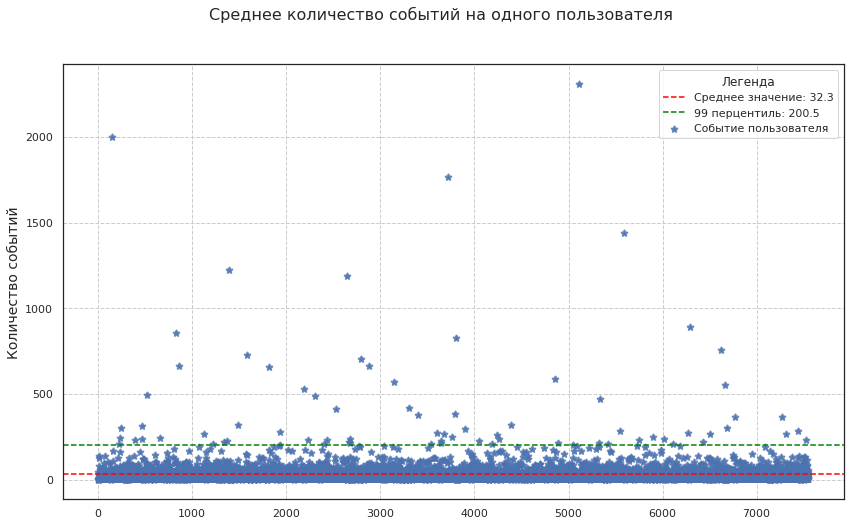

In [16]:
event_users_df = df.groupby('device_id_hash', as_index=False).agg(event_users=('device_id_hash', 'count'))
x_values = pd.Series(range(0,len(event_users_df)))
# построим график стоимостей заказов
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('Среднее количество событий на одного пользователя', fontsize=16)
ax.scatter(x_values, event_users_df['event_users'], label='Событие пользователя', marker='*', alpha=0.8, linewidth=2)
ax.axhline(y=event_users_df['event_users'].mean(), label=f"Среднее значение: {event_users_df['event_users'].mean():.1f}", color='red', linestyle='--')
ax.axhline(y=np.percentile(event_users_df['event_users'],[99]), label=f"99 перцентиль: {np.percentile(event_users_df['event_users'],[99])[0].round(2)}", color='green', linestyle='--')
ax.set_ylabel('Количество событий', fontsize=14)
ax.ticklabel_format(style='plain', axis='y')
ax.legend(title='Легенда')
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--');

В таблице сразу обращает на себя внимание большая разница между медианным и средним значениями, а так же высокое стандартное отклонение. Все это в совокупности указывает на сильное смещение даных в сторону бОльших значений. На графике видно определенное количество пользователей, которые совершили аномально большое количество событий. Из таблицы видно, что всего 1% пользователей совершил больше 200 событий, и 6 пользователей совершили более 1000 событий за две недели. Посмотрим на них.

In [17]:
# создадим список из уникальных пользователей
list_crazy_user = event_users_df[event_users_df['event_users'] > 200]['device_id_hash'].tolist()
print(f"Пользователей, совершивших более 200 событий: {len(list_crazy_user)}")
print(f"Доля пользователей, от общего числа: {len(list_crazy_user) / df['device_id_hash'].nunique() * 100:.1f}%")
print(f"Общее количество событий, совершеных этими пользователями: {len(df.loc[df['device_id_hash'].isin(list_crazy_user)])}")
print(f"Доля событий, совершеных этими пользователями: {len(df.loc[df['device_id_hash'].isin(list_crazy_user)]) / len(df) * 100:.1f}%")

Пользователей, совершивших более 200 событий: 76
Доля пользователей, от общего числа: 1.0%
Общее количество событий, совершеных этими пользователями: 34380
Доля событий, совершеных этими пользователями: 14.1%


In [18]:
# посмотрим на количество созданных ими событий
(
    df.loc[df['device_id_hash'].isin(list_crazy_user)]
       .groupby('event_name', as_index=False)
       .agg(
           cnt=('event_name', 'count')
       ).sort_values('cnt', ascending=False)       
)

,event_name,cnt
0,CartScreenAppear,13072
3,PaymentScreenSuccessful,11769
2,OffersScreenAppear,5423
1,MainScreenAppear,4090
4,Tutorial,26


In [19]:
# посмотрим на 10 пользователей, которые совершили наибольшее количество событий
(
    df.loc[df['device_id_hash'].isin(list_crazy_user)]
       .groupby('device_id_hash', as_index=False)
       .agg(
           cnt=('event_name', 'count'),
           MainScreenAppear=('event_name', lambda x: (x == 'MainScreenAppear').sum()),
           OffersScreenAppear=('event_name', lambda x: (x == 'OffersScreenAppear').sum()),
           CartScreenAppear=('event_name', lambda x: (x == 'CartScreenAppear').sum()),
           PaymentScreenSuccessful=('event_name', lambda x: (x == 'PaymentScreenSuccessful').sum())                      
       ).sort_values('cnt', ascending=False).head(10)
       )

,device_id_hash,cnt,MainScreenAppear,OffersScreenAppear,CartScreenAppear,PaymentScreenSuccessful
54,6304868067479728361,2307,46,76,1100,1085
0,197027893265565660,1998,93,107,932,866
41,4623191541214045580,1768,91,137,778,762
59,6932517045703054087,1439,112,509,417,401
15,1754140665440434215,1221,10,45,596,570
27,3337471580007169353,1186,57,77,527,525
65,7738058666231999878,888,38,68,413,368
9,1055544042902443290,854,52,58,379,365
44,4713748699910253089,824,23,59,376,366
68,8118046800480174342,755,94,46,321,293


**UPDATE**

Воронку событий приложения мы еще не составляли, но очевидно, что события оформления(CartScreenAppear) и оплаты заказа(PaymentScreenSuccessful) не должны превышать событие формирования заказа(OffersScreenAppear).

In [20]:
# посмотрим как пользователи распределены по группам
(
    df.loc[df['device_id_hash'].isin(list_crazy_user)]
       .groupby('exp_id', as_index=False)
       .agg(
           cnt_user=('device_id_hash', 'nunique')
       ).sort_values('cnt_user', ascending=False)
       )

,exp_id,cnt_user
0,246,28
2,248,26
1,247,22


Распределение по группам достаточно равномерное.

В целом, сложно сказать, что это за пользователи. С одной стороны, количество событий явно аномально. С другой, количество событий успешной оплаты у каждого пользователя чуть ниже, чем количество оформленных заказов, что не похоже на какой-то случайный набор данных. В реальной ситуации необходимо было бы выяснить у коллег, что это за пользователи. В рамках проекта данных явно не достаочно. Если удалить этих пользователей, то это будет порядка 14% от всех данных лога и 1% от всех пользователей. Учитывая, что главная цель исследования, это анализ A/A/B-теста, для нас важны уникальные пользователи. 1% это допустимые потери. При этом 14% аномальных данных по количеству событий, могут исказить другие наблюдения по проекту, что тоже говорит в пользу их удаления. Учитывая то, что мы не можем однозначно утверждать реальные это покупатели, сбой системы или ошибки выгрузки данных, лучше удалим этих пользователей из лога

In [21]:
df = df.loc[~df['device_id_hash'].isin(list_crazy_user)]

Посчитаем еще раз количество логов, пользователей и среднего количества событий на по льзователя

In [22]:
# подсчитаем количество событий в логе
print('Всего событий в логе:', len(df))
# подсчитаем количество пользователей в логе
print('Всего пользователей в логе:', df['device_id_hash'].nunique())
# подсчитаем среднее количество событий на одного пользователя в логе
print(f"Среднее количество событий на одного пользователя в логе: {(len(df) / df['device_id_hash'].nunique()):.1f}")

Всего событий в логе: 209333
Всего пользователей в логе: 7475
Среднее количество событий на одного пользователя в логе: 28.0


In [23]:
# Определим начальную и конечную даты событий
print(f"В датафрейме данные представлены с {df['event_day'].min()} по {df['event_day'].max()} включительно.")

В датафрейме данные представлены с 2019-07-25 по 2019-08-07 включительно.


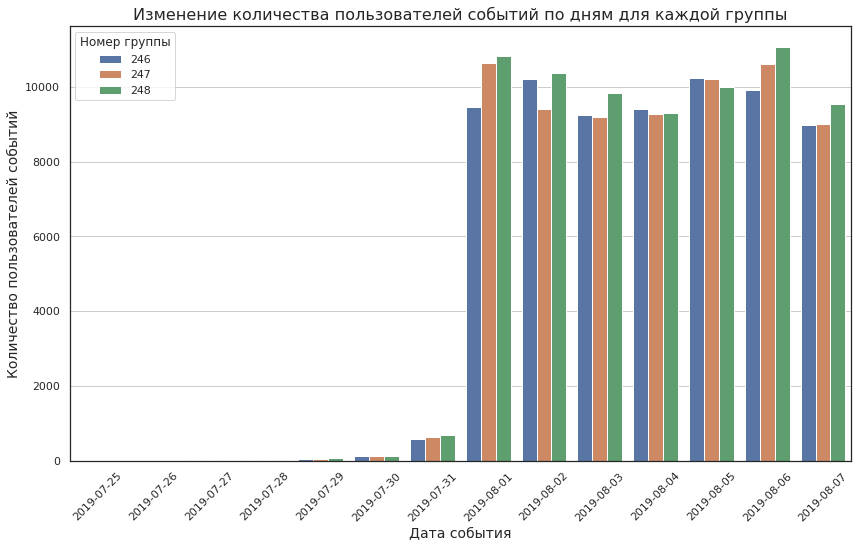

In [24]:
# построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп
daily_event_counts = df.groupby(['event_day', 'exp_id']).agg(event_users=('exp_id', 'count')).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=daily_event_counts, x='event_day', y='event_users', hue='exp_id')
plt.title('Изменение количества пользователей событий по дням для каждой группы', fontsize=16)
plt.xlabel('Дата события', fontsize=14)
plt.ylabel('Количество пользователей событий', fontsize=14)
plt.legend(title='Номер группы')
plt.xticks(rotation=45)
plt.grid(axis='y')

График наглядно показывает, что несмотря на то, что у нас данные за 14 дней (с 2019-07-25 по 2019-08-07), релевантными являются данные только за 7 дней, в период с 2019-08-01 по 2019-08-07. Учитывая, что это приложение стартапа, то скорее всего, 2019-08-01 был запуск продукта(мобильного приложения) с предшествующим этому основательным "прогревом" целевой аудитории. Просто рекламой такой резкий скачок объяснить сложно. Те пользователи, которые присутствовали до 2019-08-01 вполне могли быть теми, кто тестировал приложение.

Ввиду неактуальности данных до 2019-07-31 включительно, удалим из датафрейма.

In [25]:
# отфильтруем датасет df от ненужных нам дат
df_actual_data = df.loc[df['event_day'] >= pd.to_datetime('2019-08-01')]

In [26]:
# рассчитаем количество потерянных событий
print(f"Потеряно событий {len(df) - len(df_actual_data)}, или {((len(df) - len(df_actual_data)) / len(df) * 100):.1f}% от изначального количества данных")

Потеряно событий 2718, или 1.3% от изначального количества данных


In [27]:
# подсчитаем количество потеряных пользователей
print(f"Потеряно пользователей {df['device_id_hash'].nunique() - df_actual_data['device_id_hash'].nunique()}, или {((df['device_id_hash'].nunique() - df_actual_data['device_id_hash'].nunique()) / df['device_id_hash'].nunique() * 100):.1f}% от изначального числа пользователей")
print(f"Осталось пользователей: {df_actual_data['device_id_hash'].nunique()}")

Потеряно пользователей 17, или 0.2% от изначального числа пользователей
Осталось пользователей: 7458


До 2019-07-31 в приложении присутствовало всего 17 пользователей. Это тоже говорит о том, что скорее всего это были пользователи, которые тестировали приложение перед его запуском.

Сравним как изменились когорты пользователей после удаления нерелевантных данных.

In [28]:
(
    df['exp_id']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={'index': 'group', 'exp_id': 'perc_all'})
.merge(
    df.loc[df['event_day'] > pd.to_datetime('2019-07-31')]['exp_id']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={'index': 'group', 'exp_id': 'perc_w2'}),
    on='group').sort_values('group')
.assign(dif_perc=lambda x: abs(x['perc_all'] - x['perc_w2']))
.style.highlight_max(color='gold', subset='dif_perc')
)

,group,perc_all,perc_w2,dif_perc
2,246,32.604033,32.626866,0.022834
1,247,33.053556,33.054231,0.000675
0,248,34.342411,34.318902,0.023509


Как видно из таблицы, после удаления данных, когорты претерпели минимальные изменения. Изменение числа пользователей между когортами не превышает 0.023% от изначального распределения групп.

<a id="analis_data1"></a>
### Выводы

Изучив и проверив данные мы выяснили, что в логе присутствует 243713 событий и 7551 пользователь. При расчете среднего значения событий на пользователя, нами были обнаружены 76 пользователей, которые совершили аномально высокое количество событий(более 200). Было решено их удалить. Так же мы обнаружили, что несмотря на то, что в нашем распоряжении были данные за 14 дней (с 2019-07-25 по 2019-08-07), релевантными являются данные только за последние 7 дней, в период с 2019-08-01 по 2019-08-07. На первый взгляд кажется, что потери данных должны быть большими, но это не так. Например, потери событий составили 1.3% от изначального их количества. А число пользователей уменьшилось всего на 0.2% от изначального их числа и составило 7458. Соотношение пользователей между когортами так же претерпело минимальные изменения и составило порядка 0.02% от изначального распределения.

<a id="analis_funnel"></a>
## Изучение воронки событий

В этом разделе:
* Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
* Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю  пользователей, которые хоть раз совершали событие.
* Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку?
* По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
* На каком шаге теряем больше всего пользователей?
* Какая доля пользователей доходит от первого события до оплаты?

In [29]:
# посмотрим на уникальные события лога
sorted(df_actual_data['event_name'].unique().tolist())

['CartScreenAppear',
 'MainScreenAppear',
 'OffersScreenAppear',
 'PaymentScreenSuccessful',
 'Tutorial']

В данных присутствуют 5 типов событий:
* `MainScreenAppear` - событие главного экрана (открытие приложения)
* `OffersScreenAppear` - событие формирования заказа (использования каталога товаров, выбор товаров)
* `CartScreenAppear` - событие оформления заказа
* `PaymentScreenSuccessful` - событие оплаты заказа
* `Tutorial` - событие прохождения урока использования приложения

Посмотрим на распределение событий в логах

In [30]:
# распределение событий в логах
event_cnt = (
    df_actual_data['event_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'event_name', 'event_name': 'count'})
)
event_cnt

,event_name,count
0,MainScreenAppear,113264
1,OffersScreenAppear,40956
2,CartScreenAppear,29250
3,PaymentScreenSuccessful,22164
4,Tutorial,981


In [31]:
# визуализируем распределение событий
#pie_graph(event_cnt, title='График распределения событий в логе')

In [32]:
# построим воронку событий
#funnel_graph(event_cnt, col='count', title_text='Воронка событий')

Основываясь на данных графика воронки собитий и круговой диаграммы, мы можем сделать вывод, что прохождение урока не обязательно  для совершения покупки. Более того, ничтожно малая часть события Tutorial говорит о том, что приложение интуитивно понятно и не многие пользователи нуждаются в обучении использования приложения.

Составим воронку событий приложения:
* `MainScreenAppear` - событие главного экрана (открытие приложения)
* `OffersScreenAppear` - событие формирования заказа (выбор товаров)
* `CartScreenAppear` - событие оформления заказа
* `PaymentScreenSuccessful` - событие оплаты заказа

Построим еще раз воронку событий, но без учета события Tutorial. Рассчитаем процентное отношение события воронки к числу событий на предыдущем шаге

In [33]:
# уберем из датасета событие tutorial
df_actual_data = df_actual_data.loc[df_actual_data['event_name'] != 'Tutorial'].reset_index()

# распределение событий в логах и доля события на данном шаге относительно предыдущего
event_cnt_no_tut = (
    df_actual_data['event_name']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'event_name', 'event_name': 'count'})
    .assign(perc_incr=lambda x: 100- abs(x['count'].pct_change() * 100))
    .fillna(0)
)
event_cnt_no_tut

,event_name,count,perc_incr
0,MainScreenAppear,113264,0.000
1,OffersScreenAppear,40956,36.160
2,CartScreenAppear,29250,71.418
3,PaymentScreenSuccessful,22164,75.774


In [52]:
# построим воронку событий без учета события Tutorial
#funnel_graph(event_cnt_no_tut, col='count', title_text='Воронка событий без Tutorial')

<span style="color: gray;">Из таблицы и графиков мы видим, что после наступления события главного экрана только в 36% случаев наступает событие формирования заказа. Если наступает событие формирования заказа, то с вероятностью в 71% наступает событие оформления заказа. И если заказ оформлен, то в 76% наступает событие оплаты заказа.</span>

<span style="color: gray;">Посчитаем, сколько пользователей совершали каждое действие. Рассчитаем процентное изменение числа пользователей проходящих на следующий шаг воронки от числа пользователей на предыдущем шаге</span>

In [35]:
# посчитаем, сколько пользователей совершали каждое действие
event_cnt_users = (
    df_actual_data.loc[df_actual_data['event_name'] != 'Tutorial'].groupby('event_name', as_index=False)
    .agg(count_users=('device_id_hash', 'nunique'))
    .sort_values('count_users', ascending=False)
    .assign(
        perc_user=lambda x: (x['count_users'] / df_actual_data['device_id_hash'].nunique() * 100).round(1),
        perc_incr=lambda x: 100- abs(x['count_users'].pct_change() * 100))
    .fillna(0)
)

print(f"Уникальных пользователей {df_actual_data['device_id_hash'].nunique()}")
event_cnt_users

Уникальных пользователей 7454


,event_name,count_users,perc_user,perc_incr
1,MainScreenAppear,7344,98.500,0.000
2,OffersScreenAppear,4517,60.600,61.506
0,CartScreenAppear,3658,49.100,80.983
3,PaymentScreenSuccessful,3463,46.500,94.669


Примечательно, что 98.5% пользователей каким-то образом миновали главный экран приложения. Постотрим какие события у этих пользователей были

In [36]:
users_msa = df_actual_data.loc[df_actual_data['event_name'] == 'MainScreenAppear', 'device_id_hash'].unique().tolist()
(
    df_actual_data.loc[~df_actual_data['device_id_hash'].isin(users_msa)]
    .groupby('event_name', as_index=False)
    .agg(cnt_event=('event_name', 'count'))
    .sort_values('cnt_event', ascending=False)
)

,event_name,cnt_event
1,OffersScreenAppear,922
0,CartScreenAppear,804
2,PaymentScreenSuccessful,645


Очень похоже на воронку событий приложения, но без события главного экрана. Возможно какие-то пользователи совершали событие формирования заказа перейдя по рекламной ссылке сразу в профиль товара, тем самым минуя событие главного экрана. Или это как-то связано с пользователями, совершившими аномально большое количество событий.

Посмотрим на графики распределения пользователей по событиям

In [38]:
# построим воронку распределения пользователей совершивших действие
funnel_graph(event_cnt_users, col='count_users', title_text='Воронка распределения пользователей совершивших событие')

Из графиков мы видим, что наибольший процент потель пользователей происходит после события главного экрана. 62% пользователей, после захода в приложение переходит к формирорванию заказа. 81% после формирования заказа переходит к оформлению заказа, и 95% из оформивших заказ, оплачивают его.

Мы знаем, что не все(хоть и подавляющее большинство) пользователи совершали событие главного экрана. Посчитаем, какая доля пользователей проходит от первого события до оплаты

In [39]:
# определим список пользователей, которые совершили действие оплаты
users_pss = df_actual_data.loc[df_actual_data['event_name'] == 'PaymentScreenSuccessful', 'device_id_hash'].unique().tolist()
"""этот код вообще не нужен
# получим серию пользователей, которые вошли в список события главного экрана и список действия оплаты
uniq_users_all_step = (
                        len(
                            df_actual_data['device_id_hash']
                            .loc[(df_actual_data['device_id_hash']
                                  .isin(users_msa)) 
                                 & (df_actual_data['device_id_hash']
                                    .isin(users_pss))]
                            .unique()
                        )
                    )

#print(f"{uniq_users_all_step} пользователь, прошедший все этапы воронки. Это {(uniq_users_all_step / df_actual_data['device_id_hash'].nunique() * 100):.1f}% от всех пользователей")
"""
# UPDATE посмотрим на количество пользователей, прошедших через все этапы воронки
print(f"{len(users_pss)} пользователя, прошедших все этапы воронки. Это {(len(users_pss) / len(users_msa) * 100):.1f}% от всех пользователей")

3463 пользователя, прошедших все этапы воронки. Это 47.2% от всех пользователей


<a id="analis_funnel1"></a>
### Выводы

Изучив воронки событий и поведения пользователей, мы выяснили, что прохождение урока не обязательно для совершения покупки, а доля наступления этого события не превышает 0.4% всех событий. Что в свою очередь указывает на то, что приложение интуитивно понятно и не вызывает каких-либо сложностей в использовании. Основываясь на полученных данных в разделе, мы смогли составить воронку событий для приложения:

* `MainScreenAppear` - событие главного экрана (открытие приложения)
* `OffersScreenAppear` - событие формирования заказа (выбор товаров)
* `CartScreenAppear` - событие оформления заказа
* `PaymentScreenSuccessful` - событие оплаты заказа

Эта воронка показывает путь пользователя от запуска приложения, до оплаты заказа. Мы выяснили, что после наступления события главного экрана только в 36% случаев наступает событие формирования заказа. Если наступает событие формирования заказа, то с вероятностью в 71% наступает событие оформления заказа. И если заказ оформлен, то в 76% наступает событие оплаты заказа. Составив воронку распределения пользователей, совершивших действие, мы выяснили, что наибольший процент потерь пользователей происходит после события главного экрана, их доля составляет порядка 38%. 62% пользователей, после захода в приложение переходит к формированию заказа. 81% после формирования заказа переходит к оформлению заказа, и 95% из оформивших заказ, оплачивают его. 


<a id="analis_exp"></a>
## Анализ результатов эксперимента

В данном разделе мы проанализируем результаты экспериммента и ответим на следующие вопросы:
* Сколько пользователей в каждой экспериментальной группе?
* Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247;
* Выберим самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. 
* Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным.   * Проделаем то же самое для всех других событий. Ответим на вопрос, можно ли сказать, что разбиение на группы работает корректно;
* Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Сформируем выводы из эксперимента;
* Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. 
* Ответим на вопрос, какой уровень значимости стоит применить.

In [40]:
# Посмотрим на количество пользователей в каждой группе

(
    df_actual_data
    .groupby('exp_id', as_index=False)
    .agg(
        uniq_user=('device_id_hash', 'nunique'))
.assign(perc_group=lambda x: x['uniq_user'] / df_actual_data['device_id_hash'].nunique() * 100)
)


,exp_id,uniq_user,perc_group
0,246,2455,32.935
1,247,2490,33.405
2,248,2509,33.660


Одним из условий корректного проведения A/B, A/A/B-тестов является то, что каждый пользрователь на протяжении всего выполнениея теста должен входить только в одну группу. Проверим, есть ли пользователи, которые попали в несколь групп

In [41]:
cnt_ov_one_group = len(df_actual_data.groupby('device_id_hash', as_index=False).filter(lambda x: x['exp_id'].nunique() > 1))
print(f"Количество пользователей, состоящих в более чем одной группе: {cnt_ov_one_group}")

Количество пользователей, состоящих в более чем одной группе: 0


<a id="analis_exp1"></a>
### Проверка на статистически значимое различие долей контрольных групп 246 и 247

Мы выяснили, что каждый пользователь принадлежит только к одной группе. Одним из требований проведения A/A/B-теста, является условие, что контрольные группы (А/А) между собой не должны иметь статистически значимых различий. Проверим на различие в событиях между контрольными группами 246 и 247. Для этого проведем z-тест с коррекцией уровня значимости с помощью метода Бонферрони. Этот метод за счет контроля уровня значимости помогает избежать ошибок первого рода. Всего у нас получается 4 группы(246-247, 246-248, 247-248, 246/247-248) и в каждой группе по 4 события. Всего 16 гипотез. Передадим базовое значение уровня значимости alpha 0.05 с поправкой на количество тгипотез(тестов)

Сформулируем две гипотезы для проверку двух контрольных групп:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями контрольных групп 246 и 247 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями контрольных групп 246 и 247 есть.

In [42]:
# создадим три датафрейма с группами
group_a = df_actual_data.loc[df_actual_data['exp_id'] == 246]
group_a1 = df_actual_data.loc[df_actual_data['exp_id'] == 247]
group_b = df_actual_data.loc[df_actual_data['exp_id'] == 248]

# с помощью цикла обратимся к функции result_test_z, передавая данные групп 246 и 247
for item in df_actual_data['event_name'].unique():
    result_test_z(group_a, group_a1, item)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.6674277103003372
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.2767654959510515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.2628160759054654
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.13574398826607448
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


In [43]:
# посмотрим на фактическую разницу между группами 246 и 247 в событиях
(
    group_a.groupby('event_name', as_index=False).agg(cnt_246=('device_id_hash', 'nunique'))
    .merge(
    group_a1.groupby('event_name', as_index=False).agg(cnt_247=('device_id_hash', 'nunique')),
        on='event_name'
    ). assign(dif_perc=lambda x: abs(100 - x['cnt_246'] / x['cnt_247'] * 100))
    .sort_values('cnt_246', ascending=False)
    .style.highlight_max(color='gold', subset='dif_perc')
)

,event_name,cnt_246,cnt_247,dif_perc
1,MainScreenAppear,2423,2454,1.263244
2,OffersScreenAppear,1514,1498,1.068091
0,CartScreenAppear,1238,1216,1.809211
3,PaymentScreenSuccessful,1172,1136,3.169014


<a id="analis_exp2"></a>
#### Выводы

По результатам проведения теста, нам не удалось опровергнуть гипотезу о том, что статистически значимой разницы между долями контрольных групп 246 и 247 нет. Следовательно, можно считать, что **разделение групп работает корректно** и можно переходить к анализу результатов контрольных групп(246 и 247) и экспериментальной(248).

Из таблицы видно, что фактическая разница в количестве каждого события между группами не велика. Наибольшая разница составляет 3.16% в событии оплаты заказа(PaymentScreenSuccessful). Самым популярным событием в обоих группах, что вполне предсказуемо и ожидаемо, является событие главного экрана(MainScreenAppear)


<a id="analis_exp3"></a>
### Проверка на статистически значимое различие долей между контрольными(246, 247) и экспериментальной(248) группами с поправкой Бонферрони

Сравним каждую контрольную группу с экспериментальной, а затем объединенную контрольную группу с экспериментальной. Таким образом анализы результатов теста будут наиболее качествеными и надежными.

Сформулируем две гипотезы для групп 246 и 248:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями групп 246 и 248 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями групп 246 и 248 есть.

In [44]:
#df_actual_data# event_name, device_id_hash, event_timestamp, exp_id, event_daytime, event_day
# сравним группы 246 и 248
for item in df_actual_data['event_name'].unique():
    result_test_z(group_a, group_b, item)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.2814719389970719
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.22374437294463578
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.08551270605955108
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.22875623127967426
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


**Вывод:** ни по одному из совершенных событий не удалось опровергнуть гипотезу о статистически значимой разнице между контрольной группой 246 и экспериментальной группой 248. Иными словами, поведение пользователей обоих групп одинаково.

Сформулируем две гипотезы для групп 247 и 248:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями групп 247 и 248 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями групп 247 и 248 есть.

In [45]:
#df_actual_data# event_name, device_id_hash, event_timestamp, exp_id, event_daytime, event_day
# сравним группы 247 и 248
for item in df_actual_data['event_name'].unique():
    result_test_z(group_a1, group_b, item)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.5151100783020421
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.8985730856764382
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.5485507037235671
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.7701611050267243
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


**Вывод:** ни по одному из совершенных событий не удалось опровергнуть гипотезу о статистически значимой разнице между контрольной группой 247 и экспериментальной группой 248. Иными словами, поведение пользователей обоих групп одинаково.

Сформулируем две гипотезы для объединенной группы 246/247 и 248:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями объединенной группы 246/247 и 248 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями объединенной группы 246/247 и 248 есть.

In [46]:
# сравним объединенную группу 246/247 и 248
for item in df_actual_data['event_name'].unique():
    result_test_z(pd.concat([group_a, group_a1], axis=0), group_b, item)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.3119454749745101
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.43945868001043786
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.18112712794559194
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.6011006343280214
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


**Вывод:** ни по одному из совершенных событий не удалось опровергнуть гипотезу о статистически значимой разнице между объединенной контрольной группой 246/247 и экспериментальной группой 248. Иными словами, поведение пользователей обоих групп одинаково.

In [47]:
# посмотрим на фактическую разницу между группами 246, 247 и 248 в событиях
(
    group_a.groupby('event_name', as_index=False).agg(cnt_246=('device_id_hash', 'nunique'))
    .merge(
    group_a1.groupby('event_name', as_index=False).agg(cnt_247=('device_id_hash', 'nunique')),
        on='event_name'
    )
    .merge(
    group_b.groupby('event_name', as_index=False).agg(cnt_248=('device_id_hash', 'nunique')),
        on='event_name'
    )
    .assign(
        dif_perc_246_248=lambda x: abs(100 - x['cnt_246'] / x['cnt_248'] * 100), 
        dif_perc_247_248=lambda x: abs(100 - x['cnt_247'] / x['cnt_248'] * 100))
    .sort_values('cnt_246', ascending=False)
    .style.highlight_max(color='gold', subset=['dif_perc_246_248', 'dif_perc_247_248'])

)

,event_name,cnt_246,cnt_247,cnt_248,dif_perc_246_248,dif_perc_247_248
1,MainScreenAppear,2423,2454,2467,1.783543,0.526956
2,OffersScreenAppear,1514,1498,1505,0.598007,0.465116
0,CartScreenAppear,1238,1216,1204,2.823920,0.996678
3,PaymentScreenSuccessful,1172,1136,1155,1.471861,1.645022


Из таблицы видно, что фактическая разница в количестве каждого события между контрольными группами и экспериментальной не велика. Наибольшая разница составляет 2.8% в событии оформления заказа(CartScreenAppear) между группами 246 и 248. Самым популярным событием в всех группах, что вполне предсказуемо и ожидаемо, является событие главного экрана(MainScreenAppear). По результатам проведения теста, можно сделать вывод, что статистически значимой разницы между долями контрольных групп 246, 247 и экспериментальной 248 нет.

<a id="analis_exp4"></a>
#### Выводы
Проверка на статистически значимое различие с поправкой Бонферрони между контрольными и экспериментальной группами не показала какое-либо различие между ними. При проведении 16 тестов, нам ни разу не удалось опровергнуть нулевую гипотезу о равенстве групп

<a id="analis_exp5"></a>
### Проверка на статистически значимое различие долей между контрольными(246, 247) и экспериментальной(248) группами без поправки Бонферрони

Выше мы провели тесты на статистически значимое различие долей между контрольными(246, 247) и экспериментальной(248) группами. Там мы использовали поправку Бонферрони. Эта поправка рекомендуется при проведении множественных тестов для снижения вероятности появления ошибки первого рода. Однако, чрезмерное снижение коэффициента значимости может снижать мощность теста и увеличивать вероятность появления ошибка второго рода. Проведем еще раз тесты на статистически значимое различие между группами, но без поправки Бонферрони и с коэффициеентом значимости alpha = 0.1

Сформулируем две гипотезы для проверки двух контрольных групп:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями контрольных групп 246 и 247 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями контрольных групп 246 и 247 есть.

In [48]:
# с помощью цикла обратимся к функции result_test_z, передавая данные групп 246 и 247
for item in df_actual_data['event_name'].unique():
    result_test_z(group_a, group_a1, item, alpha=0.1, k_bonf=1)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.6674277103003372
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.2767654959510515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.2628160759054654
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.13574398826607448
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


Сформулируем две гипотезы для групп 246 и 248:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями групп 246 и 248 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями групп 246 и 248 есть.

In [49]:
# сравним группы 246 и 248
for item in df_actual_data['event_name'].unique():
    result_test_z(group_a, group_b, item, alpha=0.1, k_bonf=1)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.2814719389970719
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.22374437294463578
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.08551270605955108
Отвергаем нулевую гипотезу: разница между долями групп статистически значима

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.22875623127967426
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


Сформулируем две гипотезы для групп 247 и 248:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями групп 247 и 248 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями групп 247 и 248 есть.

In [50]:
# сравним группы 246 и 248
for item in df_actual_data['event_name'].unique():
    result_test_z(group_a1, group_b, item, alpha=0.1, k_bonf=1)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.5151100783020421
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.8985730856764382
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.5485507037235671
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.7701611050267243
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


Сформулируем две гипотезы для объединенной группы 246/247 и 248:

**Нулевая гипотеза ($H_0$)**: Статистически значимой разницы между долями объединенной группы 246/247 и 248 нет.

**Альтернативная гипотеза ($H_1$)**: Статистически значимая разница между долями объединенной группы 246/247 и 248 есть.

In [51]:
# сравним объединенную группу 246/247 и 248
for item in df_actual_data['event_name'].unique():
    result_test_z(pd.concat([group_a, group_a1], axis=0), group_b, item, alpha=0.1, k_bonf=1)


Сравниваемое событие: MainScreenAppear
р-значение равно 0.3119454749745101
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: OffersScreenAppear
р-значение равно 0.43945868001043786
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: CartScreenAppear
р-значение равно 0.18112712794559194
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой

Сравниваемое событие: PaymentScreenSuccessful
р-значение равно 0.6011006343280214
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу между долями групп статистически значимой


<a id="analis_exp6"></a>
#### Выводы

Как и при проведении тестов с поправкой Бонферрони, ни в одном из 4 тестов нам не удалось опровергнуть гипотезу о том, что статистически значимой разницы между долями контрольных групп 246 и 247 нет.

Из проведенных 12 тестов в сравнениях контрольных и экспериментальной групп, удалось опровергнуть гипотезу о том, что статистически значимой разницы между долями контрольных групп только в одном тесте. Речь идет о событии **CartScreenAppear** при сравнении контрольной группы 246 и экспериментальной 248.

Учитывая все проведенные ранее тесты с разными показателями уровня значимости, можно утверждать, что разницы в поведении пользователей между тремя группами нет.

<a id="conclusion_project"></a>
## Общие выводы по исследованию

В проекте, перед исследованием и анализом данных была проведена их предварительная обработка. Предобработка данных, это критически важный и необходимый этап, который важно провести перед началом анализа данных. Данный этап существенно повышает качество последующего анализа и что гораздо более важно – предотвращает получение искаженных, неверных данных и как следствие, формирование ошибочных выводов всего исследования. В процессе предобработки были обнаружены дубликаты данных в количестве 413 строк, что составляло 0.2% от всех данных. Эти строки были удалены. Так же была проведена проверка типов данных на соответствие их значениям, поиск не явных дубликатов и проверка на пропуски в данных.

**Изучение и проверка данных**. Изучив и проверив, данные мы выяснили, что в предоставленном датафрейме присутствует 243713 событий за период с 2019-07-25 по 2019-08-07, и 7551 пользователь. При изучении данных в разрезе времени мы обнаружили, несмотря на то, что в нашем распоряжении были данные за 14 дней (с 2019-07-25 по 2019-08-07), релевантными являются данные только за последние 7 дней, в период с 2019-08-01 по 2019-08-07. Данные по 2019-07-31включительно было решено удалить. 

При расчете среднего значения событий на пользователя, нами были обнаружены 76 пользователей, которые совершили аномально высокое количество событий(от  200 до 2300). Данные с этими пользователями так же было решено удалить.

В результате изучения и проверки данных в датафрейме осталось 243713 событий и 7458 пользователей.


**Изучение воронки событий**. Изучив воронки событий и поведения пользователей, мы выяснили, что прохождение урока не обязательно для совершения покупки, а доля наступления этого события не превышает 0.4% всех событий. Что в свою очередь указывает на то, что приложение интуитивно понятно и не вызывает каких-либо сложностей в использовании. Основываясь на полученных данных в разделе, мы смогли составить воронку событий для приложения:

* `MainScreenAppear` - событие главного экрана (открытие приложения)
* `OffersScreenAppear` - событие формирования заказа (выбор товаров)
* `CartScreenAppear` - событие оформления заказа
* `PaymentScreenSuccessful` - событие оплаты заказа

Эта воронка показывает путь пользователя от запуска приложения, до оплаты заказа. Мы выяснили, что после наступления события главного экрана только в 39% случаев наступает событие формирования заказа. Если наступает событие формирования заказа, то с вероятностью в 91% наступает событие оформления заказа. И если заказ оформлен, то в 80% наступает событие оплаты заказа. Составив воронку распределения пользователей, совершивших действие, мы выяснили, что наибольший процент потерь пользователей происходит после события главного экрана, их доля составляет порядка 38%. 62% пользователей, после захода в приложение переходит к формированию заказа. 81% после формирования заказа переходит к оформлению заказа, и 95% из оформивших заказ, оплачивают его.

**Анализ результатов эксперимента**. Перед тем, как ответить на главный вопрос проекта, повлияло ли изменение шрифтов в приложении на поведение пользователей, была проведена проверка на корректность всех расчетов. В частности мы проверили, что каждый пользователь относится только к одной группе, что нет статистически значимых различий между контрольными группами. 
Анализ результатов эксперимента проводился в два этапа. На первом этапе мы сравнили каждую контрольную группу с экспериментальной, затем объединенную контрольную группу с экспериментальной с поправкой Бонферрони. На втором, проделали все тоже самое, но уже без поправки Бонферрони и с увеличенным до 0.1 коэффициентом уровня значимости.

Всего было проведено 30 тестов на статистически значимое различие долей между контрольными и экспериментальной группами. Опровергнуть гипотезу об отсутствии статистически значимых различиях между группами удалось только в одном случае, когда был увеличен коэффициент  уровня значимости.

Резюмируя все выше сказанное, можно сделать вывод, что новые шрифты, которые показывались экспериментальной группе, никак не повлияли на поведение пользователей.
